In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conexión y carga de datos
conn = sqlite3.connect("../db/optigas.db")
df = pd.read_sql("SELECT * FROM gold_anomalias", conn)
df['timestamp'] = pd.to_datetime(df['timestamp'])
conn.close()


In [2]:
# conteo de anomalias
print(df['severidad'].value_counts())

severidad
Baja     779611
Media     51859
Alta      16476
Name: count, dtype: int64


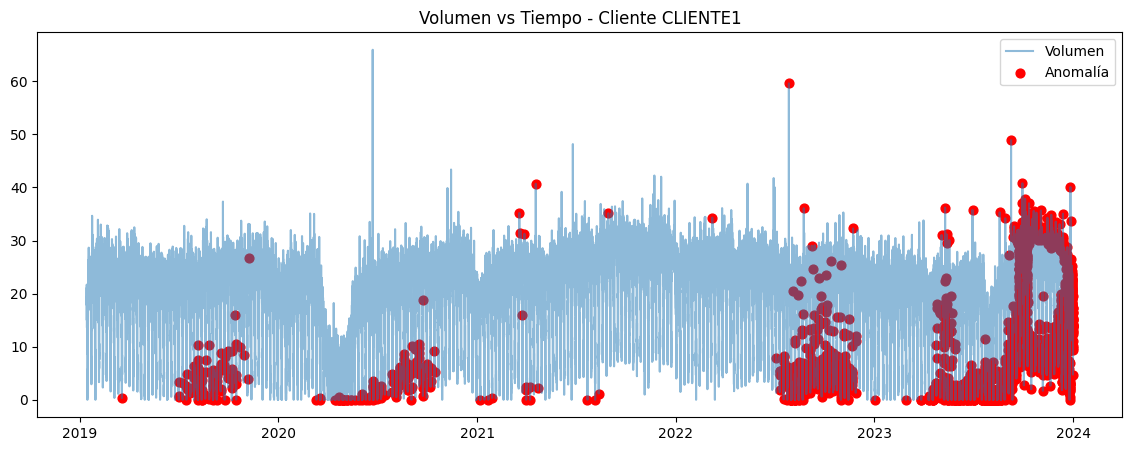

In [4]:
# Series de tiempo con anomalías resaltadas
cliente = df['cliente_id'].unique()[0]
df_c = df[df['cliente_id'] == cliente]

plt.figure(figsize=(14, 5))
plt.plot(df_c['timestamp'], df_c['volumen'], label='Volumen', alpha=0.5)
plt.scatter(df_c[df_c['anomaly_isoforest'] == -1]['timestamp'],
            df_c[df_c['anomaly_isoforest'] == -1]['volumen'],
            color='red', label='Anomalía', s=40)
plt.legend()
plt.title(f"Volumen vs Tiempo - Cliente {cliente}")
plt.show()


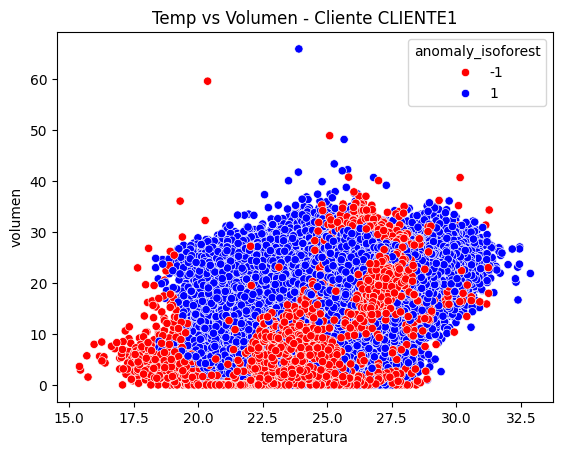

In [5]:
# Dispersión temperatura vs volumen
sns.scatterplot(data=df_c, x='temperatura', y='volumen',
                hue='anomaly_isoforest', palette={1: 'blue', -1: 'red'})
plt.title(f"Temp vs Volumen - Cliente {cliente}")
plt.show()
